In [35]:
import os
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm  
import matplotlib.pyplot as plt 


**Without Normalizing**

In [ ]:
audio_file = 'Data/Snoring/191004_434_st12_Snoring_2634_1.wav'
audio_file
non_snoring  = 'Data/Silence/190917_396_st12_Silent_3_16.wav'

In [69]:
ipd.Audio(audio_file)


In [107]:
signal, sr = librosa.load(audio_file, mono = True, sr =44100)
signal1, sr1 = librosa.load(non_snoring)

(99622,)

In [109]:
#extract MFCC
mfcc = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)
mfcc1 = librosa.feature.mfcc(signal1, n_mfcc=13, sr=sr1)

<ipython-input-109-ee3e888ba95a>:2: FutureWarning: Pass y=[0.43482837 0.4307587  0.43485463 ... 0.46767592 0.46827504 0.46754143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)
<ipython-input-109-ee3e888ba95a>:3: FutureWarning: Pass y=[0.00446617 0.00698579 0.00598112 ... 0.00420672 0.00390747 0.00407006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc1 = librosa.feature.mfcc(signal1, n_mfcc=13, sr=sr1)


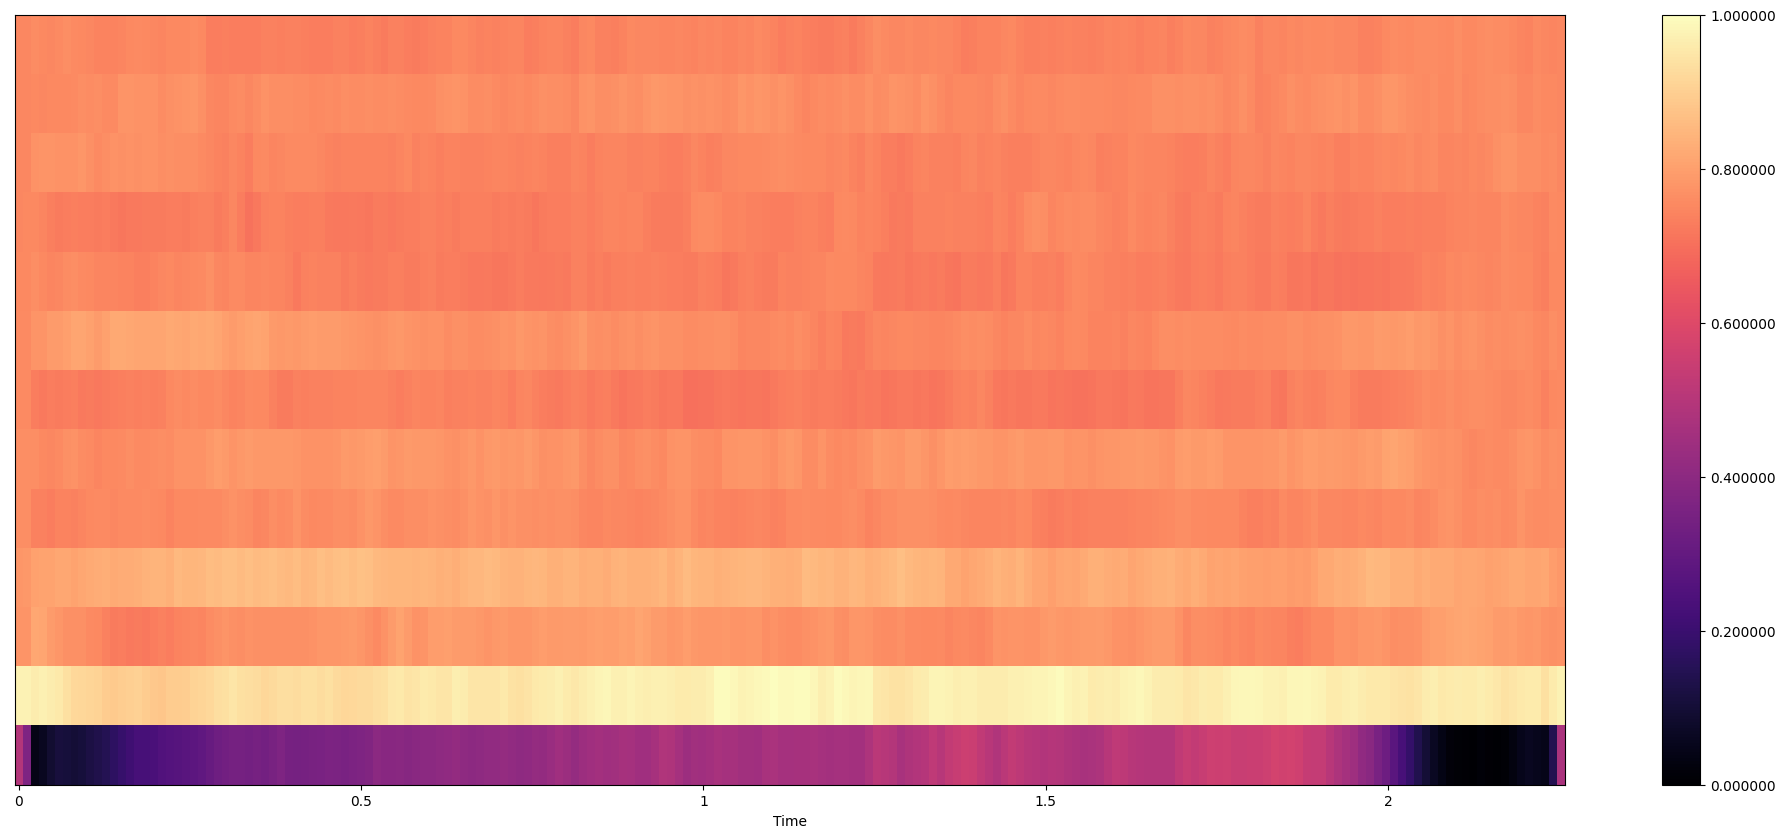

In [116]:
#vizualize mfcc
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc, x_axis='time' ,sr = sr)
plt.colorbar(format="%2f")
plt.show()

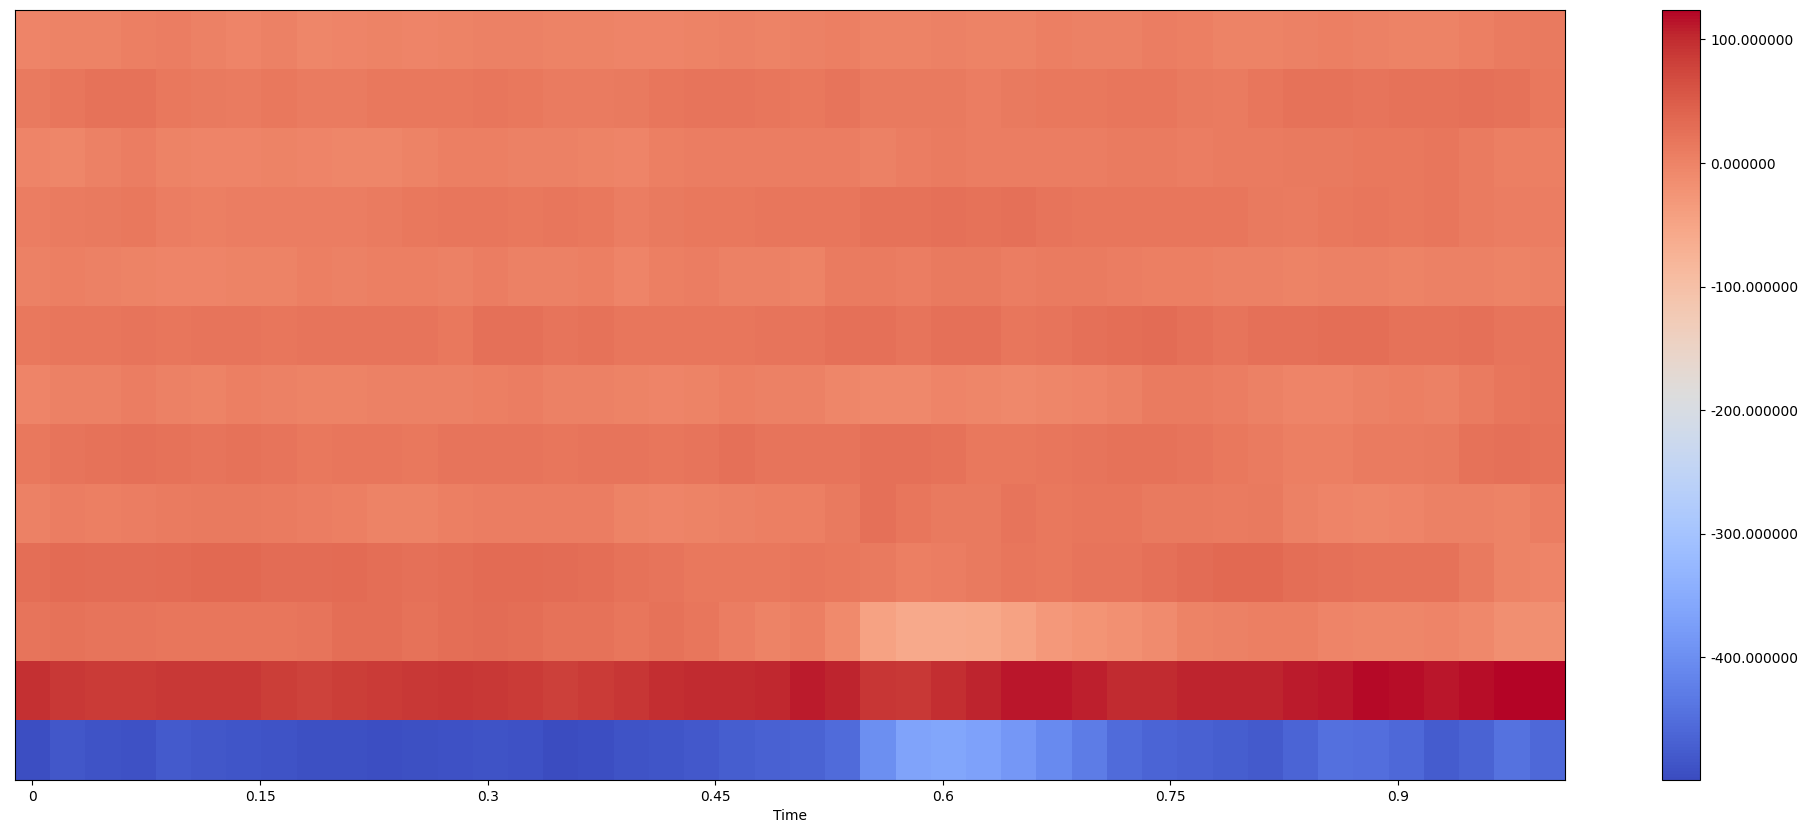

In [81]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc1, x_axis = 'time',sr = sr1)
plt.colorbar(format="%2f")
plt.show()

In [93]:
#calculate delta and delta2 MFCC
delta_mfccs = librosa.feature.delta(mfcc)
delta2_mfccs = librosa.feature.delta(mfcc, order = 2)


In [118]:
mfcc.shape

(13, 195)

**With Normalizing**

In [114]:
mfcc = (mfcc - np.min(mfcc))/(np.max(mfcc) - np.min(mfcc))

In [115]:
mfcc

array([[0.493972  , 0.3668694 , 0.04059033, ..., 0.04466006, 0.14338836,
        0.4696356 ],
       [0.97513866, 0.9760853 , 0.9613498 , ..., 0.9367897 , 0.95847017,
        0.9745335 ],
       [0.7736973 , 0.7760703 , 0.814718  , ..., 0.7718471 , 0.7681544 ,
        0.77278244],
       ...,
       [0.747548  , 0.74982256, 0.7728731 , ..., 0.7568981 , 0.7585063 ,
        0.7492858 ],
       [0.7467102 , 0.74818695, 0.75009334, ..., 0.75023353, 0.75031006,
        0.7475449 ],
       [0.74634033, 0.7482419 , 0.7588988 , ..., 0.74915546, 0.74411273,
        0.7461947 ]], dtype=float32)